# 1. Generate dữ liệu

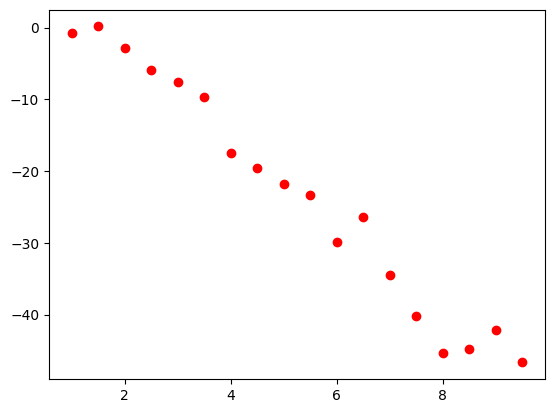

In [136]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1.0, 10.0, 0.5)
noise = np.random.normal(0, 3.0, size=x.shape) # đại diện phần sai số khi đo lường dữ liệu
# cho noise tăng thì từ 3 -> 5 thì sẽ dao động mạnh hơn
y = -6*x + 10 + noise # phương trình đúng tìm cách đưa ra dự đoán

plt.plot(x, y, 'ro') # ro là red + cricle marker, tương ứng câu lệnh dưới
# plt.plot(x, y, color='red', marker='o', linestyle='None')



❓ Có những ký hiệu phổ biến nào khác trong format string?

Màu sắc

r → red

b → blue

g → green

k → black

Marker (hình điểm)

o → tròn

x → dấu X

s → vuông

^ → tam giác

Line style

- → đường liền

-- → gạch đứt

: → chấm chấm

Ví dụ:

plt.plot(x, y, 'b--')   # đường màu xanh, gạch đứt
plt.plot(x, y, 'gx')    # điểm xanh, dấu X
plt.plot(x, y, 'r^')    # điểm đỏ, tam giác

In [137]:
print(x.shape)
x = x.reshape(-1, 1) # chuyển đổi x thành ma trận cột
print(x.shape)


(18,)
(18, 1)


In [138]:
y.shape


(18,)

# B2: Build Model - Cài đặc mô hình

In [139]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # phải lấy ra object
reg.fit(x, y) # đầu vào x phải là [[ x1, x2, ...],
# [x3,x4,...] ] với các xi là feature theo từng cột
# do đó có bước reshape x ở trước 
# tưởng tượng x là từng hàng của ma trận, y là từng cột có nhãn gì 

LinearRegression()

y = ax + b

## Hê sô x

In [140]:
# Hệ số biến x tìm được - tổng quát sẽ có nhiều cột - 1 vector
reg.coef_ 


array([-6.06688325])

## Thành phân bias

In [141]:
reg.intercept_


np.float64(8.586361673820932)

ta thấy kết quả sau khi dự đoán hàm là xấp xỉ hàm ban đầu bị lệch do noise nhiễu ban đầu thêm vào

# Trưc quan hóa mô hinh

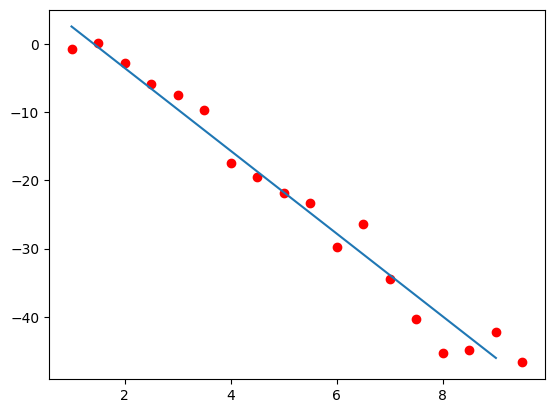

In [142]:
# plot các điểm dữ liệu
# plt.plot(x[:, 0], y, 'ro')
plt.plot(x[:, :], y, 'ro')


# plot mô hình
# điểm đầu và điểm cuối của đường thẳng thông qua tham số x và bias vừa tìm được
plt.plot([1, 9], [reg.coef_[0] * 1 + reg.intercept_, reg.coef_[0] * 9 + reg.intercept_]) 
# quan sát scatter rồi cho chạy đường thẳng dự đoán x trong đoạn 1 -> 9
# và cho chạy các giá trị dự đoán hàm y từ đoạn x là 1 -> 9 tương ứng y


# Evalute Model

In [ ]:
import math

pred = reg.predict(x)

error = np.sqrt(sum((pred - y) ** 2) / len(y)) # sai số bình phương giữa dự đoán và thực tế
error
# RMSE

np.float64(2.5657475162719328)

# Generate dữ liệu phi tuyến

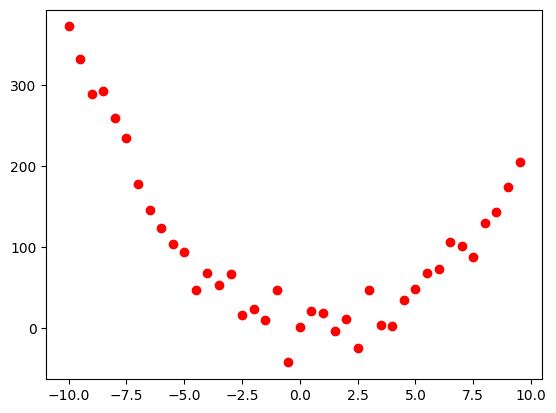

In [144]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10.0, 10.0, 0.5) # tối đa tới 9.5
noise = np.random.normal(0, 20.0, size=x.shape)
y = 3*x**2 - 7*x + 2 + noise
# mô phỏng hàm đơn giản phi tuyến bậc 2
plt.plot(x, y, 'ro')
x = x.reshape((1, len(x))) # hình như bước này không cần vì ở dưới nữa cũng reshape rồi


In [145]:
x = x.reshape((-1, 1))
reg = LinearRegression()
reg.fit(x, y)



LinearRegression()

In [146]:
import math
pred = reg.predict(x)
delta = (pred - y).reshape(-1)
error = math.sqrt(((delta).dot(delta)) / len(y))
print(error)


90.28963898823959


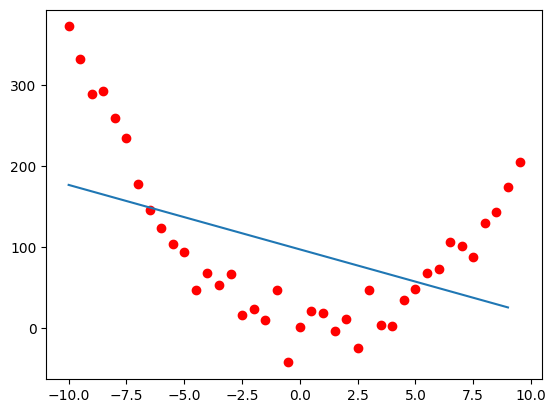

In [147]:
# plot các điểm
plt.plot(x[:, 0], y, 'ro')

# plot mô hình

plt.plot([-10, 9], [reg.coef_[0] * (-10) + reg.intercept_, reg.coef_[0] * 9 + reg.intercept_]) 


- Tinh huống `underfitting` ==> Them đặc trung ==> Feature engineering

# Thêm đac trưng


thêm cột x^2

In [148]:
X = np.concatenate((x, x**2), axis=1) # thêm cột x^2 vào ma trận đầu vào
print(X)


[[-10.   100.  ]
 [ -9.5   90.25]
 [ -9.    81.  ]
 [ -8.5   72.25]
 [ -8.    64.  ]
 [ -7.5   56.25]
 [ -7.    49.  ]
 [ -6.5   42.25]
 [ -6.    36.  ]
 [ -5.5   30.25]
 [ -5.    25.  ]
 [ -4.5   20.25]
 [ -4.    16.  ]
 [ -3.5   12.25]
 [ -3.     9.  ]
 [ -2.5    6.25]
 [ -2.     4.  ]
 [ -1.5    2.25]
 [ -1.     1.  ]
 [ -0.5    0.25]
 [  0.     0.  ]
 [  0.5    0.25]
 [  1.     1.  ]
 [  1.5    2.25]
 [  2.     4.  ]
 [  2.5    6.25]
 [  3.     9.  ]
 [  3.5   12.25]
 [  4.    16.  ]
 [  4.5   20.25]
 [  5.    25.  ]
 [  5.5   30.25]
 [  6.    36.  ]
 [  6.5   42.25]
 [  7.    49.  ]
 [  7.5   56.25]
 [  8.    64.  ]
 [  8.5   72.25]
 [  9.    81.  ]
 [  9.5   90.25]]


In [149]:
print(X.shape)


(40, 2)


In [150]:
reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

In [151]:
reg.coef_  # hệ số của x và x^2 tìm được


array([-6.48359619,  2.96014768])

In [152]:
reg.intercept_ # bias tìm được




np.float64(-1.3487075021317025)

Root mean squared error ( RMSE)— căn bậc hai của sai số bình phương trung bình.

a dot a nghĩa là a**2 ( a mũ 2) với a là vector 1 chiều và dùng dot nhanh hơn phép mũ, dễ mở rộng sang dạng ma trận

In [ ]:
pre = reg.predict(X)
delta = (pred - y).reshape(-1) # ép về 1 chiều tính dot dễ hơn 
error = math.sqrt(((delta).dot(delta)) / len(y))  
print(error)


90.28963898823959


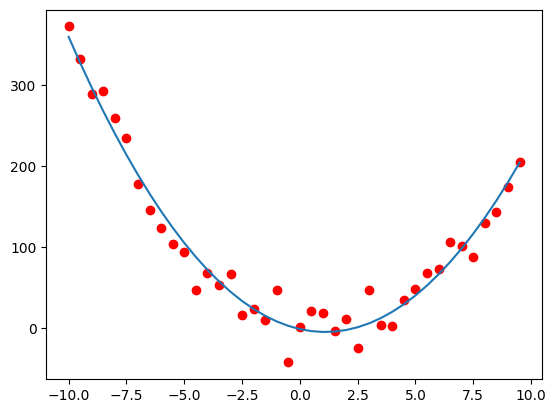

In [154]:
x = x.reshape(-1) # trả lại các vector trước khi plot data =
# plot các điểm
plt.plot(x, y, 'ro')

# plot đường thẳng
plt.plot(x, x**2 * reg.coef_[1] + x * reg.coef_[0] + reg.intercept_)
